In [126]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = ride_data.merge(city_data, how = 'left', on = 'city')

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [127]:
urban_df = df.loc[df['type'] == "Urban"]
suburban_df = df.loc[df['type'] == "Suburban"]
rural_df = df.loc[df['type'] == "Rural"]
urbanDrivers = urban_df.groupby("city")["driver_count"].sum()
suburbanDrivers = suburban_df.groupby("city")["driver_count"].sum()
ruralDrivers = rural_df.groupby("city")["driver_count"].sum()
urbanFare =  urban_df.groupby("city")["fare"].mean()
suburbanFare =  suburban_df.groupby("city")["fare"].mean()
ruralFare =  rural_df.groupby("city")["fare"].mean()
urbanRides = urban_df.groupby("city")["ride_id"].count()
suburbanRides = suburban_df.groupby("city")["ride_id"].count()
ruralRides = rural_df.groupby("city")["ride_id"].count()

## Bubble Plot of Ride Sharing Data

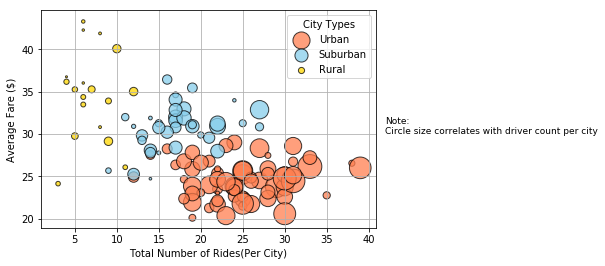

In [128]:
# Obtain the x and y coordinates for each of the three city types
fig, ax = plt.subplots()
urban_plt = ax.scatter(urbanRides, urbanFare, s = urbanDrivers/4, c = "coral",alpha = 0.75, edgecolors= "black", label = "Urban")
suburban_plt = ax.scatter(suburbanRides, suburbanFare, s = suburbanDrivers/2, c = "skyblue",alpha = 0.75, edgecolors= "black", label = "Suburban")
rural_plt = ax.scatter(ruralRides, ruralFare, s = ruralDrivers, c = "gold",alpha = 0.75, edgecolors= "black", label = "Rural")

# Build the scatter plots for each city types

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
# Create a legend
plt.legend(loc='upper right',title = "City Types",markerscale = None)

# Incorporate a text label regarding circle size
note = "Note:\nCircle size correlates with driver count per city"
plt.text(42, 30, note, fontsize = 9)
# Save Figure
plt.savefig("../Images/CityTypeComparison.png")
plt.show()

## Total Fares by City Type

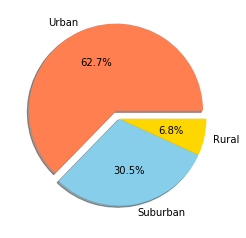

In [129]:
# Calculate Type Percents
CityTypes = ["Urban", "Suburban", "Rural"]
explode = (0.1,0,0)
colors = ["coral","skyblue", "gold"]
fares = df.groupby("type")["fare"].sum().sort_values(ascending = False)
# Build Pie Chart
plt.pie(fares, explode=explode, labels=CityTypes, colors=colors, autopct="%1.1f%%", shadow=True)
# Save Figure
plt.savefig("../Images/TotalFaresPie.png")
plt.show()

## Total Rides by City Type

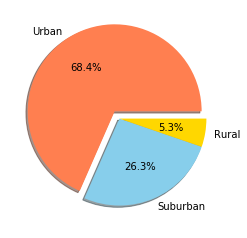

In [130]:
# Calculate Ride Percents
rides = df.groupby("type")["ride_id"].count().sort_values(ascending = False)
# Build Pie Chart
plt.pie(rides, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True)
# Save Figure
plt.savefig("../Images/TotalRidesPie.png")
plt.show()

## Total Drivers by City Type

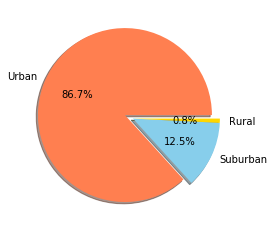

In [133]:
# Calculate Ride Percents
drivers = df.groupby("type")["driver_count"].sum().sort_values(ascending = False)
# Build Pie Chart
plt.pie(drivers, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True)
# Save Figure
plt.savefig("../Images/TotalDriversPie.png")
plt.show()